In [10]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [11]:
df = pd.read_csv('..\Dados\MICRODADOS_ENEM_2022.csv', encoding = 'latin1', sep= ';', decimal = ',')
filtro_presenca = (df['IN_TREINEIRO'] == 0) & (df['TP_PRESENCA_CN'] == 1) & (df['TP_PRESENCA_CH'] == 1) & (df['TP_PRESENCA_LC'] == 1) & (df['TP_PRESENCA_MT'] == 1) & (df['TP_STATUS_REDACAO'] == 1)
df[filtro_presenca]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2,2.100570e+11,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,2.100560e+11,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
7,2.100560e+11,2022,6,F,1,2,1,1,0,1,...,B,A,A,C,A,A,E,A,A,B
9,2.100550e+11,2022,4,F,1,3,1,1,1,1,...,A,A,A,B,A,A,B,A,A,B
11,2.100550e+11,2022,2,F,1,1,1,2,0,3,...,A,A,A,B,A,A,C,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,2.100580e+11,2022,3,M,1,1,1,2,0,2,...,B,A,A,B,A,A,C,A,A,B
1048569,2.100570e+11,2022,2,F,1,3,1,2,0,2,...,B,A,A,B,A,A,E,A,A,B
1048570,2.100560e+11,2022,8,M,1,1,1,1,6,1,...,A,A,B,B,A,A,D,A,B,B
1048571,2.100580e+11,2022,3,F,1,3,1,1,1,1,...,A,A,A,C,A,A,E,A,B,B


C:\Users\ugoma\AppData\Local\Temp\ipykernel_35604\2739551948.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['NU_NOTA_REDACAO'] = df_filtrado['NU_NOTA_REDACAO'].astype(float)
C:\Users\ugoma\AppData\Local\Temp\ipykernel_35604\2739551948.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['NU_NOTA_CH'] = df_filtrado['NU_NOTA_CH'].astype(float)
C:\Users\ugoma\AppData\Local\Temp\ipykernel_35604\2739551948.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

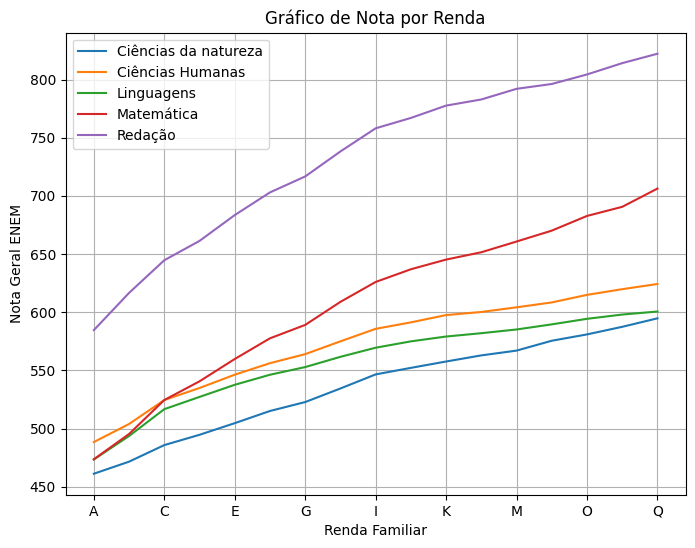

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('..\Dados\MICRODADOS_ENEM_2022.csv', encoding='latin1', sep=';', decimal=',')
filtro_presenca = (df['IN_TREINEIRO'] == 0) & (df['TP_PRESENCA_CN'] == 1) & (df['TP_PRESENCA_CH'] == 1) & (df['TP_PRESENCA_LC'] == 1) & (df['TP_PRESENCA_MT'] == 1) & (df['TP_STATUS_REDACAO'] == 1)
df_filtrado = df[filtro_presenca]

plt.figure(figsize=(8, 6))

df_filtrado['NU_NOTA_REDACAO'] = df_filtrado['NU_NOTA_REDACAO'].astype(float)
df_filtrado['NU_NOTA_CH'] = df_filtrado['NU_NOTA_CH'].astype(float)
df_filtrado['NU_NOTA_CN'] = df_filtrado['NU_NOTA_CN'].astype(float)
df_filtrado['NU_NOTA_LC'] = df_filtrado['NU_NOTA_LC'].astype(float)
df_filtrado['NU_NOTA_MT'] = df_filtrado['NU_NOTA_MT'].astype(float)

media_notas_por_renda = df_filtrado.groupby('Q006')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()

media_notas_por_renda['NU_NOTA_CN'].plot(label='Ciências da Natureza')
media_notas_por_renda['NU_NOTA_CH'].plot(label='Ciências Humanas')
media_notas_por_renda['NU_NOTA_LC'].plot(label='Linguagens e Códigos')
media_notas_por_renda['NU_NOTA_MT'].plot(label='Matemática')
media_notas_por_renda['NU_NOTA_REDACAO'].plot(label='Redação')

plt.title('Gráfico de Nota por Renda')
plt.xlabel('Renda Familiar')
plt.ylabel('Nota Geral ENEM')
plt.grid(True)
plt.legend(['Ciências da natureza', 'Ciências Humanas','Linguagens','Matemática','Redação'])
plt.show()

C:\Users\ugoma\AppData\Local\Temp\ipykernel_35604\328779744.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[notas_colunas] = df_filtrado[notas_colunas].apply(pd.to_numeric, errors='coerce')


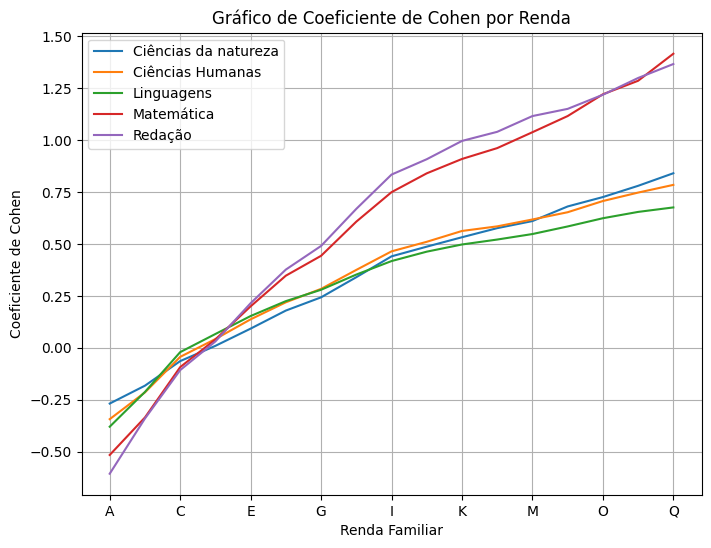

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

filtro_presenca = (df['IN_TREINEIRO'] == 0) & (df['TP_PRESENCA_CN'] == 1) & (df['TP_PRESENCA_CH'] == 1) & (df['TP_PRESENCA_LC'] == 1) & (df['TP_PRESENCA_MT'] == 1) & (df['TP_STATUS_REDACAO'] == 1)
df_filtrado = df[filtro_presenca]

notas_colunas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
df_filtrado[notas_colunas] = df_filtrado[notas_colunas].apply(pd.to_numeric, errors='coerce')

df_filtrado = df_filtrado.dropna(subset=notas_colunas)

media_agregada = df_filtrado[notas_colunas].mean()
desvio_padrao_agregado = df_filtrado[notas_colunas].stack().std()

media_notas_por_renda = df_filtrado.groupby('Q006')[notas_colunas].mean()
media_notas_por_renda = (media_notas_por_renda - media_agregada) / desvio_padrao_agregado

plt.figure(figsize=(8, 6))
for materia in notas_colunas:
    media_notas_por_renda[materia].plot(label=materia)

plt.title('Gráfico de Coeficiente de Cohen por Renda')
plt.xlabel('Renda Familiar')
plt.ylabel('Coeficiente de Cohen')
plt.grid(True)
plt.legend(['Ciências da natureza', 'Ciências Humanas','Linguagens','Matemática','Redação'])
plt.show()


In [11]:
import pandas as pd

df = pd.read_csv('..\Dados\MICRODADOS_ENEM_2022.csv', encoding='latin1', sep=';', decimal=',')

def starts_with_2_or_3(x):
    return str(x).startswith('2') or str(x).startswith('3')

filtro_regiao = df['CO_MUNICIPIO_PROVA'].apply(starts_with_2_or_3)
df_filtrado = df[filtro_regiao]

print(df_filtrado) 

2          2925758
3          3201308
5          3304557
6          2611606
7          3304904
            ...   
3476097    3509502
3476098    3131307
3476100    3524709
3476101    2604106
3476103    3517406
Name: CO_MUNICIPIO_PROVA, Length: 2380811, dtype: int64
